# ***A***

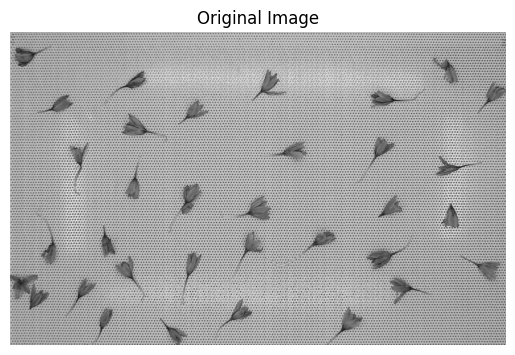

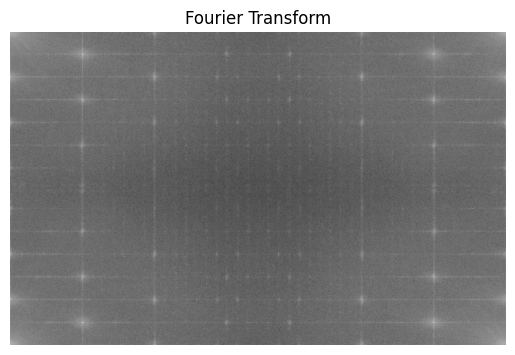

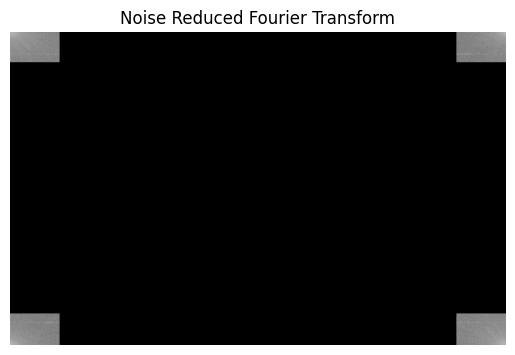

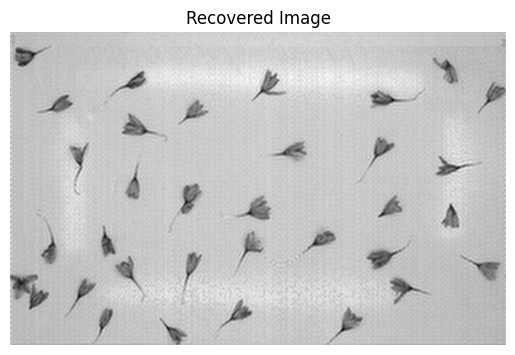

In [18]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Constants for the script
IMAGE_PATH = "/content/saffrun.jpg"
NOISE_FRACTION = 0.1  # Fraction of the image to remove as noise

# Read original image in grayscale
original_image = cv2.imread(IMAGE_PATH, cv2.IMREAD_GRAYSCALE)

# Display original image
plt.imshow(original_image, cmap='gray')
plt.title("Original Image")
plt.axis('off')
plt.show()

# Apply 2D Fourier transform and display the spectrum:
# The resulting image, when visualized, shows the spectrum of frequencies.
# The low frequencies are concentrated at the center of the image, and the high frequencies are spread out towards the edges.
# By applying a logarithmic scale (np.log(1 + np.abs(fourier_transform))), we enhance the visibility of components,
# as the spectrum's dynamic range is very high and most details are not visible on a linear scale.
fourier_transform = np.fft.fft2(original_image)
plt.imshow(np.log(1 + np.abs(fourier_transform)), cmap='gray')
plt.title("Fourier Transform")
plt.axis('off')
plt.show()

# Zero out the central part of the Fourier transform to remove noise:
# Visually, after this operation, the Fourier transform's image will have a dark region in the center (corresponding to the zeroed-out low frequencies),
# surrounded by the higher frequencies. This modification aims to reduce low-frequency noise, but it can also remove some actual low-frequency image content.
w, h = original_image.shape
fourier_transform[int(w*NOISE_FRACTION):int(w*(1-NOISE_FRACTION))] = 0
fourier_transform[:, int(h*NOISE_FRACTION):int(h*(1-NOISE_FRACTION))] = 0

# Display the noise-reduced Fourier transform
plt.imshow(np.log(1 + np.abs(fourier_transform)), cmap='gray')
plt.title("Noise Reduced Fourier Transform")
plt.axis('off')
plt.show()

# Apply inverse FFT to get the cleaned image and display it:
# The resulting image shows reduced noise,
# However, because some legitimate image details might also have been eliminated with the noise reduction step,
# the image could appear slightly blurred or missing some details, especially in areas that relied on the removed low-frequency components.
cleaned_image = np.real(np.fft.ifft2(fourier_transform))
plt.imshow(cleaned_image, cmap='gray')
plt.title("Recovered Image")
plt.axis('off')
plt.show()


# ***B***

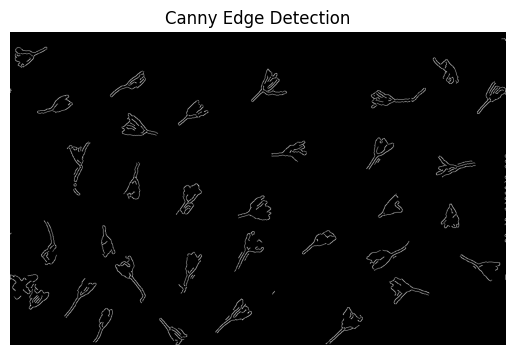

In [20]:
# Apply Canny edge detection on the image resulting from the inverse FFT
canny_image = cv2.Canny(np.uint8(cleaned_image), 50, 100)

# Display the image after applying Canny edge detection
plt.imshow(canny_image, cmap='gray')
plt.title("Canny Edge Detection")
plt.axis('off')  # Hides the axis to focus on the image
plt.show()

*Threshold1 (50):*


*   The lower threshold, Threshold1, determines the minimum   
intensity gradient required for a pixel to be considered as an edge pixel.

*   A lower value for Threshold1 will result in more potential edge pixels being detected, potentially including weaker edges and noise.
*   By setting Threshold1 to 50, it's likely that the algorithm is configured to consider only relatively strong gradients as potential edge pixels. This can help in reducing false positives caused by noise but might also lead to the omission of some weaker edges.


*Threshold2 (100):*

*    The upper threshold, Threshold2, is used in the hysteresis procedure to determine which edges are retained as final edges.
*    Pixels with gradient values above Threshold2 are immediately marked as strong edge pixels.
*    Pixels with gradient values between Threshold1 and Threshold2 are considered weak edge pixels and are retained only if they are connected to strong edge pixels.
*    A higher value for Threshold2 results in more stringent edge detection, ensuring that only strong and continuous edges are retained.
*    By setting Threshold2 to 100, the algorithm is configured to retain only those edges with relatively high gradients, potentially reducing the inclusion of weaker or noisy edges.

# ***C***

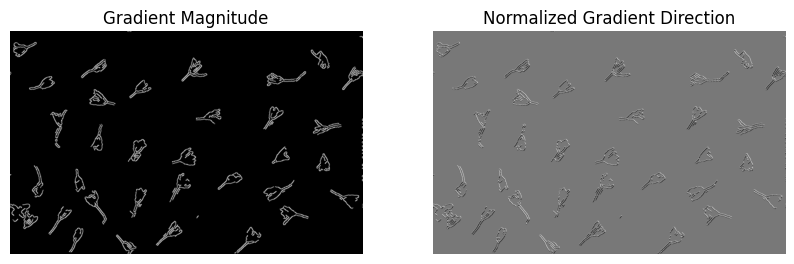

In [22]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Assuming 'canny_image' is already defined and holds the Canny edge detected image

# Calculate gradients along the x and y axis
grad_x = cv2.Sobel(canny_image, cv2.CV_64F, 1, 0, ksize=3)
grad_y = cv2.Sobel(canny_image, cv2.CV_64F, 0, 1, ksize=3)

# Calculate the gradient magnitude
gradient_magnitude = np.sqrt(grad_x**2 + grad_y**2)

# Calculate the gradient direction (angle)
gradient_direction = np.arctan2(grad_y, grad_x) * (180 / np.pi)  # Convert from radians to degrees

# Normalize the gradient direction for visualization
# First, add 180 to move the range from [-180, 180] to [0, 360]
gradient_direction_normalized = gradient_direction + 180
# Then, normalize to [0, 255]
gradient_direction_normalized = np.uint8(255 * gradient_direction_normalized / np.max(gradient_direction_normalized))

# Display the gradient magnitude
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(gradient_magnitude, cmap='gray')
plt.title("Gradient Magnitude")
plt.axis('off')

# Display the normalized gradient direction
plt.subplot(1, 2, 2)
plt.imshow(gradient_direction_normalized, cmap='gray')
plt.title("Normalized Gradient Direction")
plt.axis('off')

plt.show()


# ***D***

Step 1: Identify Regions of Interest
Petals: The gradients at the edges of petals are likely to point outward from the center of the flower, as petals usually present a color contrast with the background and possibly with the stem.
Stem: The stem's gradients would primarily be vertical or along the stem's length, indicating a different orientation compared to the petal edges.

Step 2: Gradient Orientation Analysis
Analyze the orientations of the gradients to segregate regions corresponding to petals and the stem. This can involve:

Filtering gradients by orientation to identify potential stem regions (e.g., gradients that are mostly vertical).
Similarly, identifying petal edges by looking for gradients pointing in a radial direction from an estimated flower center.

Step 3: Edge Detection
Apply edge detection algorithms (e.g., Canny edge detection) to enhance the identified regions of interest based on gradient orientations. This can help in refining the boundaries of the stem and petals.

Step 4: Detecting Intersection
Intersection Point: The intersection point between the stem and a petal could be identified where the gradient orientations change from being predominantly vertical (stem) to radially outward (petal). This transition zone is the target.
Curve Fitting: In some cases, fitting curves to the identified regions of the stem and petals and then finding their intersection points mathematically can be a more precise approach.